# Customer Revenue Prediction
#    Made by: Yatharth Asthana

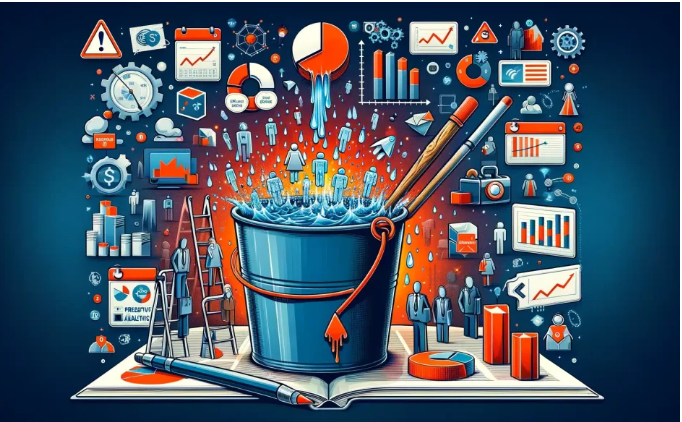

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# dataset can be found here: https://www.kaggle.com/henrysue/online-shoppers-intention
shop = pd.read_csv("/content/online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Out target column is: Revenue - A boolean representing whether or not the user completed the purchase.

In [ ]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
shop.shape

(12330, 18)

In [ ]:
shop.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
# Create a mapping of month names to numeric values
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Replace month names with numeric values in the 'Month' column
shop['Month'] = shop['Month'].map(month_mapping)

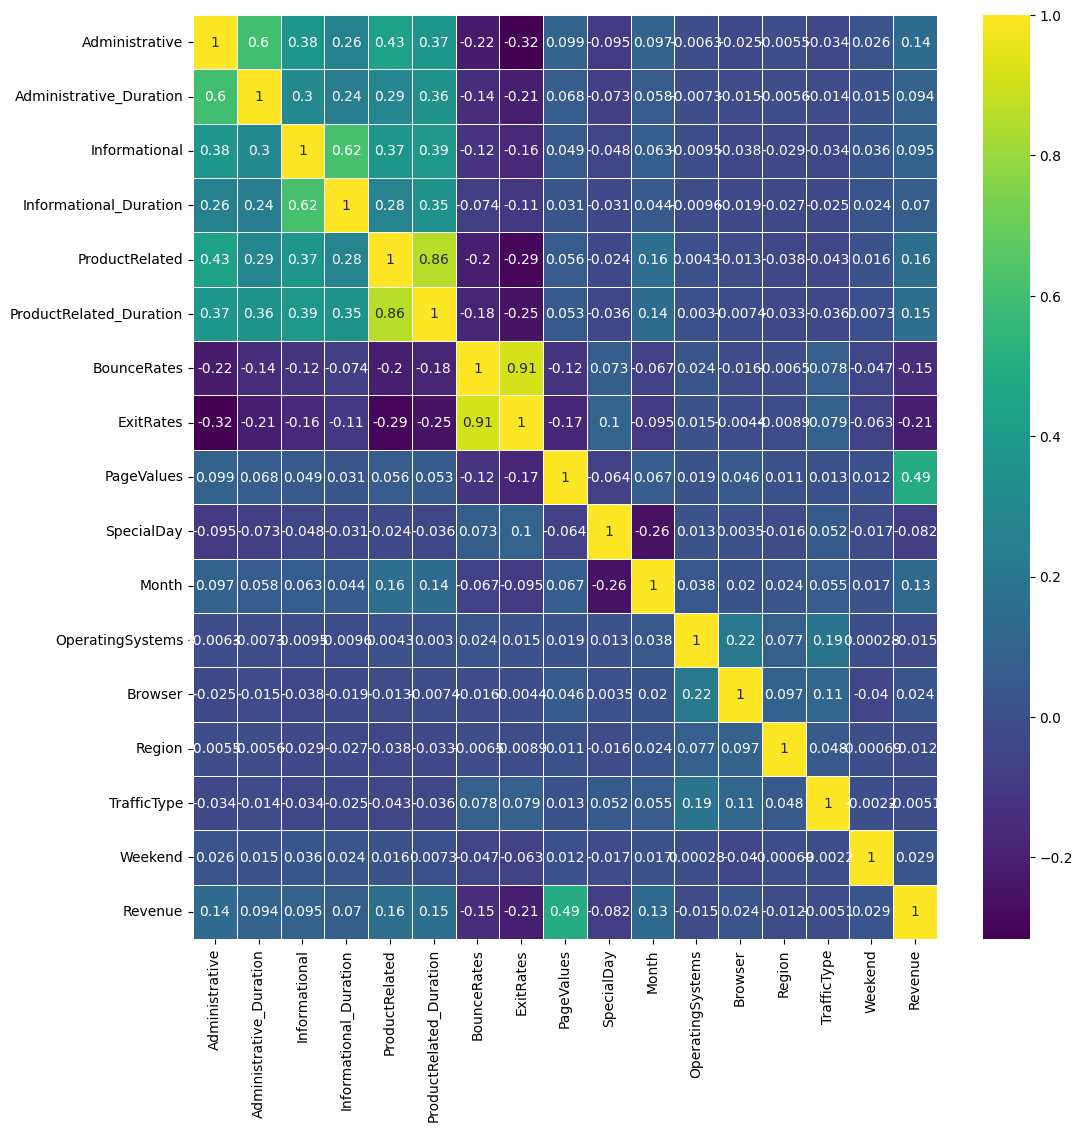

In [ ]:
# calculate the correlation and plot the heatmap
plt.figure(figsize=(12, 12))
# Include numeric_only=True to consider only numeric features for correlation calculation
sns.heatmap(shop.corr(numeric_only=True), annot=True, cmap='viridis', linewidths=.5)
plt.show()

In [ ]:
shop['VisitorType']
#shop.columns

,VisitorType
0,Returning_Visitor
1,Returning_Visitor
2,Returning_Visitor
3,Returning_Visitor
4,Returning_Visitor
...,...
12325,Returning_Visitor
12326,Returning_Visitor
12327,Returning_Visitor
12328,Returning_Visitor


In [ ]:
shope = shop.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [ ]:
# Finding about categorical data

In [ ]:
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [ ]:
shope['ProductRelated'].value_counts() # a categorical type but the data is too spread (ranges from 1 too 399)

,count
ProductRelated,
1,622
2,465
3,458
4,404
6,396
...,...
243,1
409,1
262,1


In [ ]:
shope['Month'].value_counts()

,count
Month,
5,3364
11,2998
3,1907
12,1727
10,549
9,448
8,433
7,432
6,288


In [ ]:
shope['OperatingSystems'].value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [ ]:
shope['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [ ]:
shope['Browser'].value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


In [ ]:
shope['Region'].value_counts()

,count
Region,
1,4780
3,2403
4,1182
2,1136
6,805
7,761
9,511
8,434
5,318


In [ ]:
visitor = pd.get_dummies(shope['VisitorType'])

X = pd.concat([shope, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False,False,False,True
1,0.0,0.0,2,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False,False,False,True
2,0.0,0.0,1,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False,False,False,True
3,0.0,0.0,2,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False,False,False,True
4,0.0,0.0,10,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False,False,False,True


In [ ]:
# I have built some features and extracted some feature data. Task left is to remove redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [ ]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [ ]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [ ]:
# The above code converts the boolean values to float type - actaully it converts all the data into float type. This has been done so that
# the sequential model is able to build tensors out of them
y.shape

(12330,)

In [ ]:
X_new.shape

(12330, 15)

In [ ]:
# Defining the model
model = Sequential()
input_dim = X_new.shape[1]
# Input layer and first hidden layer
model.add(Dense(units=64, activation="relu", input_dim=input_dim))  # Replace input_dim with the actual input feature count
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout with 30% rate

# Second hidden layer
model.add(Dense(units=128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout with 40% rate

# Third hidden layer
model.add(Dense(units=64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for multi-class classification (assuming 2 classes here)
model.add(Dense(units=2, activation="softmax"))

# Compile the model with Adam optimizer and learning rate scheduler
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model (increase epochs for better accuracy)
history = model.fit(X_new, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,754 (73.26 KB)

 Trainable params: 18,242 (71.26 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7208 - loss: 0.6806 - val_accuracy: 0.8358 - val_loss: 0.4243
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8692 - loss: 0.3700 - val_accuracy: 0.8374 - val_loss: 0.3982
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8840 - loss: 0.3177 - val_accuracy: 0.8390 - val_loss: 0.3852
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8871 - loss: 0.2891 - val_accuracy: 0.8394 - val_loss: 0.3849
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8907 - loss: 0.2887 - val_accuracy: 0.8463 - val_loss: 0.3710
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8967 - loss: 0.2745 - val_accuracy: 0.8423 - val_loss: 0.3698
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2610 - val_accuracy: 0.8410 - val_loss: 0.3717
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8968 - loss: 0.2714 - val_accu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42) # Split the data

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Train on training data
print("Random Forest Accuracy:", rf_model.score(X_test, y_test)) # Evaluate on testing data

Random Forest Accuracy: 0.884022708840227


In [ ]:
!pip install scikeras

In [ ]:

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier  # Import from scikeras

def build_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_model, verbose=0)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'RMSprop'],
    'neurons': [16, 32, 64]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_new, y)

print("Best Accuracy:", grid_result.best_score_)
print("Best Parameters:", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import sklearn
print(sklearn.__version__) # verify the version

1.6.0


In [ ]:
!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# Function to create the model
def build_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu', input_dim=X_new.shape[1]))  # Input layer with input_dim
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 units
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'RMSprop'],
    'neurons': [16, 32, 64]
}

best_accuracy = 0
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for optimizer in param_grid['optimizer']:
            for neurons in param_grid['neurons']:
                # Create and train model
                model = build_model(optimizer, neurons)
                history = model.fit(X_new, y, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

                # Evaluate accuracy
                accuracy = history.history['val_accuracy'][-1]  # Get final validation accuracy

                # Update best parameters if accuracy is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'neurons': neurons}

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Accuracy: 0.8580697774887085
Best Parameters: {'batch_size': 32, 'epochs': 50, 'optimizer': 'RMSprop', 'neurons': 16}


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8443 - loss: 0.3954 - val_accuracy: 0.9012 - val_loss: 0.2603
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.2759 - val_accuracy: 0.8956 - val_loss: 0.2576
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8938 - loss: 0.2691 - val_accuracy: 0.8961 - val_loss: 0.2546
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8986 - loss: 0.2538 - val_accuracy: 0.8946 - val_loss: 0.2548
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.2459 - val_accuracy: 0.8936 - val_loss: 0.2533
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8962 - loss: 0.2521 - val_accuracy: 0.8966 - val_loss: 0.2512
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.2472 - val_accuracy: 0.8936 - val_loss: 0.2504
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.2356 - val_accuracy: 0.8961

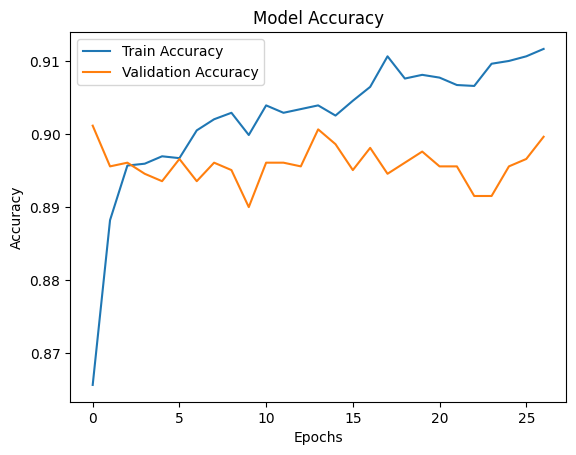

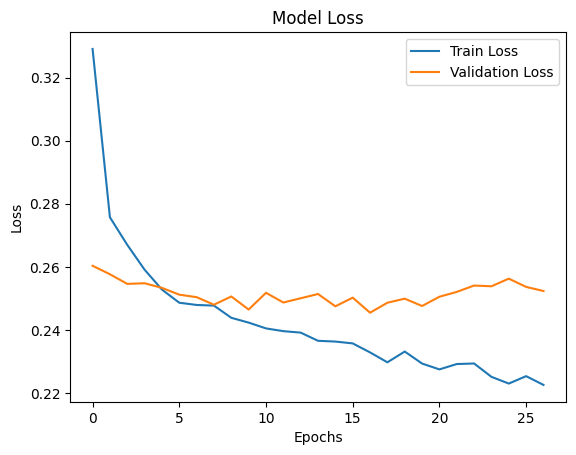

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X_new)
# Use get_feature_names_out instead of get_feature_names
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(X_new.columns))

# Combine the original dataset with polynomial features
X_poly = pd.concat([X_new.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Neural Network Model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Binary classification output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adding Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the Model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluating the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Visualizing Training History for efficient visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD

# using RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
"""
In the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns
in our X (Sepal Length, Sepal Width, Petal Length, Petal Width).

After this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.
The last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation
function as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along
with “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.
"""

'\nIn the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns \nin our X (Sepal Length, Sepal Width, Petal Length, Petal Width).\n\nAfter this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.\nThe last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation \nfunction as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along \nwith “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.\n'

In [ ]:
model.fit(X_new,y,epochs=100, validation_split=0.1)

Epoch 1/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7978 - loss: 2.0649 - val_accuracy: 0.7989 - val_loss: 0.6512
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8695 - loss: 0.4349 - val_accuracy: 0.8313 - val_loss: 0.5194
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.4012 - val_accuracy: 0.7737 - val_loss: 0.6720
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3696 - val_accuracy: 0.8297 - val_loss: 0.5989
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.3588 - val_accuracy: 0.8329 - val_loss: 0.5228
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.3436 - val_accuracy: 0.8418 - val_loss: 0.4249
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3151 - val_accuracy: 0.8329 - val_loss: 0.4409
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3178 - val_accu

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8530 - loss: 0.4042 - val_accuracy: 0.9002 - val_loss: 0.2608
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.2915 - val_accuracy: 0.8966 - val_loss: 0.2570
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8942 - loss: 0.2670 - val_accuracy: 0.8971 - val_loss: 0.2591
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.2683 - val_accuracy: 0.8941 - val_loss: 0.2523
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.2751 - val_accuracy: 0.8986 - val_loss: 0.2568
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2476 - val_accuracy: 0.8976 - val_loss: 0.2495
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.2620 - val_accuracy: 0.8976 - val_loss: 0.2659
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2600 - val_accuracy: 0.8951

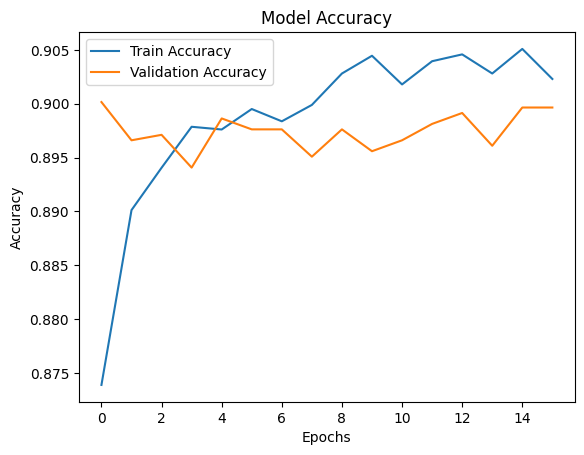

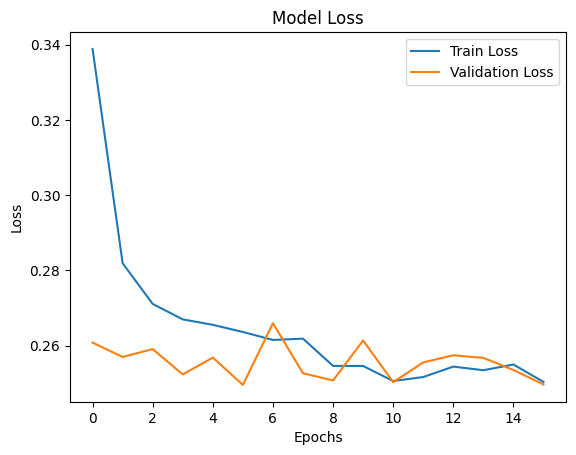

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X_new)
# Use get_feature_names_out instead of get_feature_names
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(X_new.columns))

# Combine the original dataset with polynomial features
X_poly = pd.concat([X_new.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Neural Network Model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Binary classification output layer

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 7: Train the Model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Step 8: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 9: Visualize Training History (Optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.4660 - val_accuracy: 0.8540 - val_loss: 0.3329
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.3534 - val_accuracy: 0.8748 - val_loss: 0.2964
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.3131 - val_accuracy: 0.8870 - val_loss: 0.2839
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.3012 - val_accuracy: 0.8925 - val_loss: 0.2765
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.2872 - val_accuracy: 0.8966 - val_loss: 0.2719
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.2897 - val_accuracy: 0.9007 - val_loss: 0.2692
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.2808 - val_accuracy: 0.9002 - val_loss: 0.2666
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.2690 - val_accuracy: 0.9012

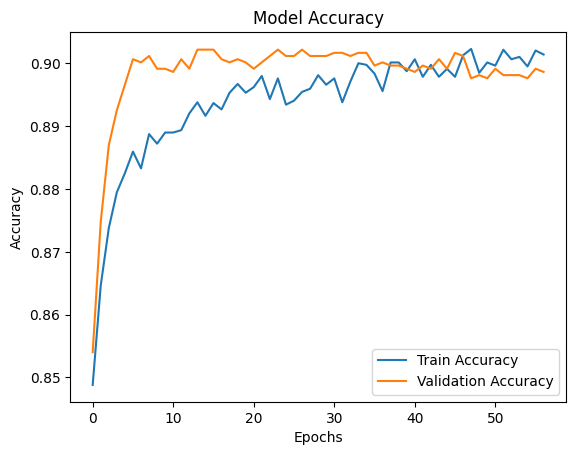

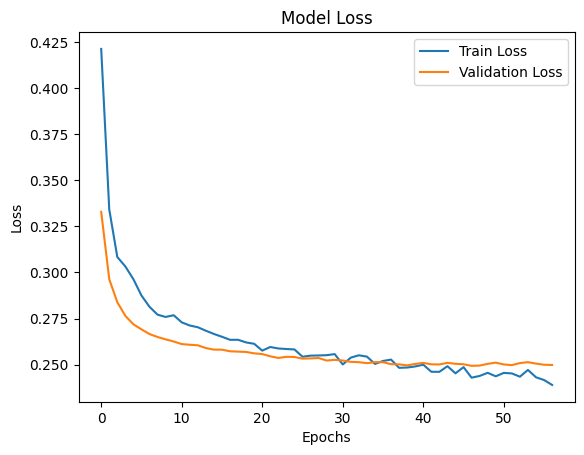

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X_new)
# Use get_feature_names_out instead of get_feature_names
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(X_new.columns))

# Combine the original dataset with polynomial features
X_poly = pd.concat([X_new.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Neural Network Model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Binary classification output layer

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 7: Train the Model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Step 8: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 9: Visualize Training History (Optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  penalty,


Voting Classifier Accuracy: 87.39%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2055
         1.0       0.76      0.36      0.49       411

    accuracy                           0.87      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.86      0.87      0.85      2466


Confusion Matrix:
[[2007   48]
 [ 263  148]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  penalty,


Logistic Regression Accuracy: 86.86%
Random Forest Accuracy: 88.40%
SVC Accuracy: 87.06%


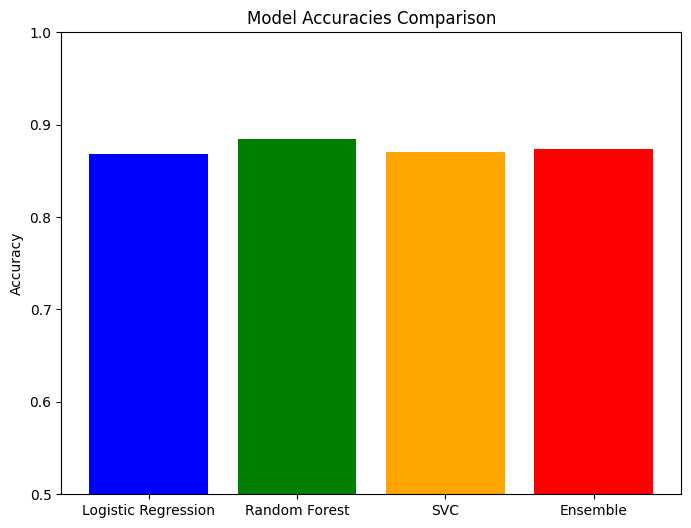

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Define the individual models
model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = SVC(probability=True, random_state=42)

# Create the Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2), ('svc', model3)],
    voting='soft')

# Fit the model
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting Accuracy over Individual Models
individual_accuracies = []
for model, name in zip([model1, model2, model3], ['Logistic Regression', 'Random Forest', 'SVC']):
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_model)
    individual_accuracies.append((name, acc))
    print(f"{name} Accuracy: {acc * 100:.2f}%")

# Plot individual model accuracies and ensemble accuracy
models = [name for name, _ in individual_accuracies] + ["Ensemble"]
accuracies = [acc for _, acc in individual_accuracies] + [accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0.5, 1.0)  # Adjust range for better visualization
plt.show()


In [ ]:
X_new

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,1,1,1,1,0.0,False,False,True
1,0.0,0.0,2,0.000000,0.100000,0.000000,0.0,2,2,1,2,0.0,False,False,True
2,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,4,1,9,3,0.0,False,False,True
3,0.0,0.0,2,0.050000,0.140000,0.000000,0.0,3,2,2,4,0.0,False,False,True
4,0.0,0.0,10,0.020000,0.050000,0.000000,0.0,3,3,1,4,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53,0.007143,0.029031,12.241717,0.0,4,6,1,1,1.0,False,False,True
12326,0.0,0.0,5,0.000000,0.021333,0.000000,0.0,3,2,1,8,1.0,False,False,True
12327,0.0,0.0,6,0.083333,0.086667,0.000000,0.0,3,2,1,13,1.0,False,False,True
12328,75.0,0.0,15,0.000000,0.021053,0.000000,0.0,2,2,3,11,0.0,False,False,True
